# Week 3 handin

# week 9 Exercise Feature space

## Ex 1
`Data = 'https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv'`
### Download the data

- Programatically download the data from the above link.
- Import the data into a Pandas dataframe.
- Show the head of the Pandas dataframe.

### Feature engineering
- Reduce the dataset by:
  - Make == Honda
  - Fueltype == Gasoline
  - Remove outliers. Hint: `df[column name'] < df['column name'].quantile(0.90)`
  - Only use 2 features: 'Fuel Information.Highway mpg' and 'Engine Information.Engine Statistics.Horsepower'
  - Normalize data (reduce values to be between 0 and 1)
  
### Linear regression

- Perform linear regression where x = horsepower and y = mpg
- What is the coefficient (slope) of your model? What does this number mean?
- According to your model, what is `y` when `x=1`.
- Show the regression line on a scatterplot with the other datapoints.

## 02 Status
Here is a status on the handin. How far you got. What is implemented and what is not

## 03 Solution part 1

In [24]:
%pylab inline 
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


In [25]:
# 1.2 some code here with docstrings
url = "https://think.cs.vt.edu/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url, sep=",", encoding="utf-8")
print(df.head(1))

   Dimensions.Height  Dimensions.Length  Dimensions.Width  \
0                140                143               202   

  Engine Information.Driveline        Engine Information.Engine Type  \
0              All-wheel drive  Audi 3.2L 6 cylinder 250hp 236ft-lbs   

   Engine Information.Hybrid  Engine Information.Number of Forward Gears  \
0                       True                                           6   

  Engine Information.Transmission  Fuel Information.City mpg  \
0  6 Speed Automatic Select Shift                         18   

  Fuel Information.Fuel Type  Fuel Information.Highway mpg  \
0                   Gasoline                            25   

  Identification.Classification Identification.ID Identification.Make  \
0        Automatic transmission  2009 Audi A3 3.2                Audi   

  Identification.Model Year  Identification.Year  \
0              2009 Audi A3                 2009   

   Engine Information.Engine Statistics.Horsepower  \
0                  

In [26]:
is_honda = df["Identification.Make"] == "Honda"
is_gasoline = df["Fuel Information.Fuel Type"] == "Gasoline"
df = df[is_honda & is_gasoline]

## 04 Solution part 2

In [27]:
# 2.1
from typing import List

def remove_outliers(df, col_names: List[str]) -> pd.DataFrame:
    new_df = None

    for col_name in col_names:
        lower, upper = get_lower_and_upper_percentile(df.sort_values(by=col_name))
        if new_df is None:
            new_df = df.iloc[lower:]
        else:
            new_df = new_df.iloc[lower:]
        new_df = new_df.iloc[:upper]

    return new_df

def get_lower_and_upper_percentile(df):
    samples = len(df)
    lower = 0.10 * samples
    upper = 0.90 * samples
    return int(lower), int(upper)

fuel = "Fuel Information.Highway mpg"
horse = "Engine Information.Engine Statistics.Horsepower"
df = remove_outliers(df, [fuel, horse])

In [28]:
encoder = OneHotEncoder()
n = df[fuel].to_numpy().reshape(-1, 1)
i = df[horse].to_numpy().reshape(-1, 1)
fuel_encode = encoder.fit_transform(n).todense()
horse_encode = encoder.fit_transform(i).todense()
print(fuel_encode)
print(horse_encode)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [29]:
model = LinearRegression()
model.fit(i, df[fuel])
print(model.coef_)
print(model.predict([[1]]))

[-0.08471171]
[45.71718368]


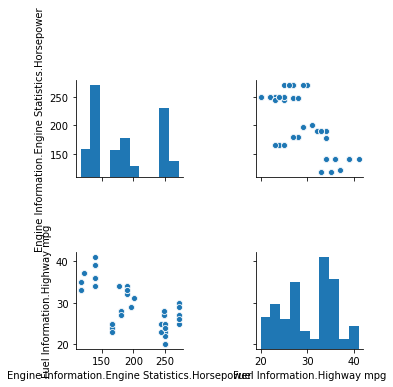

In [31]:
import seaborn as sb

data_frame = df[[horse, fuel]]

sb.pairplot(data_frame)

No handles with labels found to put in legend.


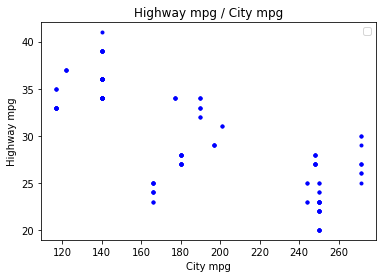

In [33]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(data_frame[horse].astype(int), data_frame[fuel].astype(int), 'b.')
plt.plot(label='linear')
plt.title('Highway mpg / City mpg')
plt.xlabel('City mpg')
plt.ylabel('Highway mpg')
plt.legend()